# K Means

In [2]:
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import svm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris, make_moons
from sklearn.datasets._samples_generator import make_blobs
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline, Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.base import clone


from sklearn.svm import SVR, SVC
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans

#import graphviz
from sklearn import preprocessing
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import  iris_data
from mlxtend.plotting import plot_decision_regions
import itertools
from scipy.cluster.hierarchy import ward, dendrogram, linkage, fcluster



In [4]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Elbow Method

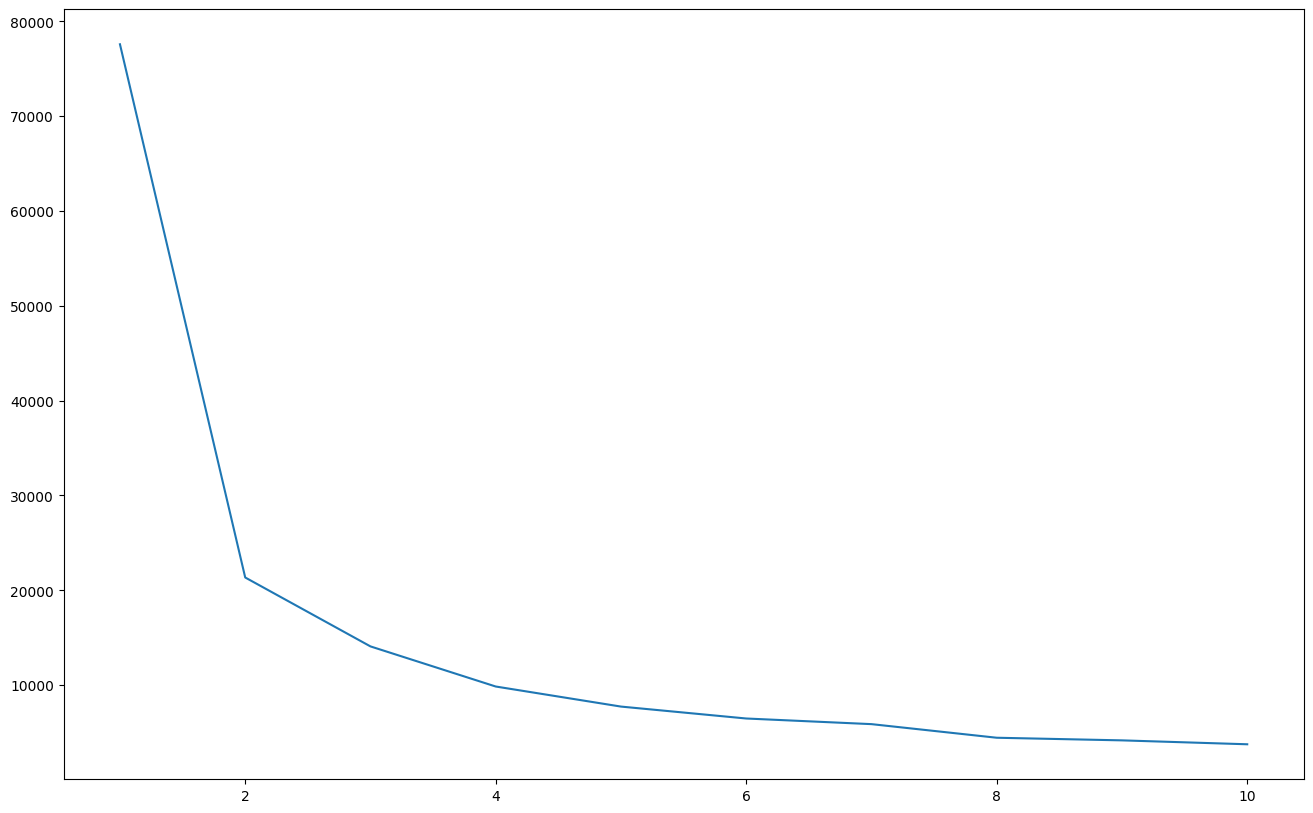

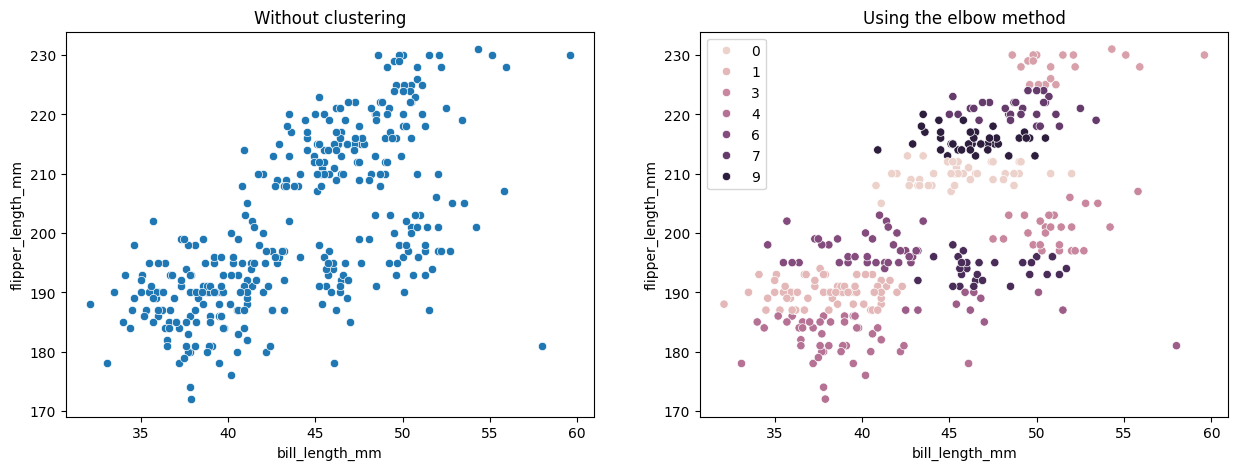

21352.354689017277
[[ 47.7647482  215.92805755]
 [ 41.29064039 190.63546798]]
6
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [5]:

df = df[['bill_length_mm', 'flipper_length_mm']]
df = df.dropna(axis=0)


wcss= []

for i in range(1, 11):
    cluster = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster.fit(df)
    wcss.append(cluster.inertia_)

ks = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(16,10))
sns.lineplot(x=ks, y=wcss)
plt.show()


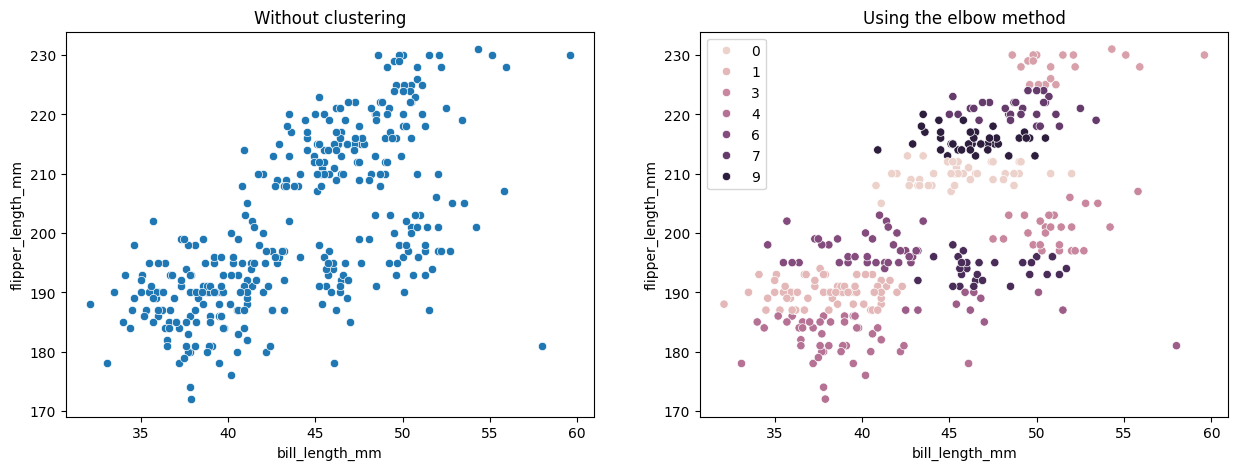

21352.354689017277
[[ 47.7647482  215.92805755]
 [ 41.29064039 190.63546798]]
6
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [6]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='bill_length_mm', y='flipper_length_mm').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='bill_length_mm', y='flipper_length_mm', hue=cluster.labels_).set_title('Using the elbow method')
plt.show()


k_means = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=42)

k_means.fit(df)
print(k_means.inertia_)

print(k_means.cluster_centers_)
print(k_means.n_iter_)
print(k_means.labels_)
